## Explore Hits

- Perform EDA on _hits_ Data.

In [1]:
import sys, os, glob, yaml

In [2]:
import math
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import trackml.dataset
import seaborn as sns

In [4]:
sys.path.append('src')

### _Dataset_

In [5]:
# mu- data (old)
# input_dir = './data_sets/pandaml/data_3.0_7.0_GeV/'

# mu+mu- data (current)
input_dir = './data_sets/pandaml/data_0.1_1.5_GeV/'

# pbarp data (coming)
# input_dir = os.environ['HOME']+'/current/2_deepana/pandaml/data/'

In [6]:
# Find All Input Data Files (hits.csv, cells.csv, particles.csv, truth.csv)
all_files = os.listdir(input_dir)

# Extract File Prefixes (use e.g. xxx-hits.csv)
suffix = '-hits.csv'
file_prefixes = sorted(os.path.join(input_dir, f.replace(suffix, ''))
                       for f in all_files if f.endswith(suffix))

In [7]:
file_prefixes[:10]

['./data_sets/pandaml/data_0.1_1.5_GeV/event0000000000',
 './data_sets/pandaml/data_0.1_1.5_GeV/event0000000001',
 './data_sets/pandaml/data_0.1_1.5_GeV/event0000000002',
 './data_sets/pandaml/data_0.1_1.5_GeV/event0000000003',
 './data_sets/pandaml/data_0.1_1.5_GeV/event0000000004',
 './data_sets/pandaml/data_0.1_1.5_GeV/event0000000005',
 './data_sets/pandaml/data_0.1_1.5_GeV/event0000000006',
 './data_sets/pandaml/data_0.1_1.5_GeV/event0000000007',
 './data_sets/pandaml/data_0.1_1.5_GeV/event0000000008',
 './data_sets/pandaml/data_0.1_1.5_GeV/event0000000009']

In [8]:
event_id = 0
event_prefix = file_prefixes[event_id]

In [9]:
# load an event
hits, tubes, particles, truth = trackml.dataset.load_event(event_prefix)

## Hits

The hits file contains the following values for each hit/entry:

* __hit_id__: numerical identifier of the hit inside the event.
* __x, y, z__: measured x, y, z position (in millimeter) of the hit in global coordinates.
* __volume_id__: numerical identifier of the detector group.
* __layer_id__: numerical identifier of the detector layer inside the group.
* __module_id__: numerical identifier of the detector module inside the layer.


Here we have the $x, y, z$ global coordinates (in cm) of where the particles hit the detector surface. The volume/layer/module id could in principle be deduced from x, y, z. They are given here to simplify detector-specific data handling.

In [10]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-14.869700,-10.605,35.0,9,0,38
1,2,-15.744300,-11.110,35.0,9,1,144
2,3,-16.618999,-11.615,35.0,9,2,256
3,4,-17.493700,-12.120,35.0,9,3,374
4,5,-18.368401,-12.625,35.0,9,4,498


### Assign New Quantities

In [11]:
# (1) add a new column
# hits['r'] = hits.apply(lambda row: np.sqrt(row.x**2 + row.y**2), axis=1)
# hits = hits.assign(r=hits.apply(lambda row: np.sqrt(row.x**2 + row.y**2), axis=1))

In [12]:
# (2) add new columns
r = np.sqrt(hits.x**2 + hits.y**2)
phi = np.arctan2(hits.y, hits.x)
hits.assign(r=r, phi=phi).head()

,hit_id,x,y,z,volume_id,layer_id,module_id,r,phi
0,1,-14.869700,-10.605,35.0,9,0,38,18.264008,-2.522066
1,2,-15.744300,-11.110,35.0,9,1,144,19.269537,-2.527083
2,3,-16.618999,-11.615,35.0,9,2,256,20.275585,-2.531606
3,4,-17.493700,-12.120,35.0,9,3,374,21.282009,-2.535701
4,5,-18.368401,-12.625,35.0,9,4,498,22.288759,-2.539426


### Sort a Quantities

In [13]:
# sort "r" column
hits.assign(r=r, phi=phi).sort_values(by=['r']).head()

,hit_id,x,y,z,volume_id,layer_id,module_id,r,phi
117,118,-8.746860,14.140,35.0,9,0,8,16.626699,2.124773
66,67,7.872170,-14.645,35.0,9,0,59,16.626699,-1.077575
48,49,16.618999,-1.515,35.0,9,0,77,16.687910,-0.090909
22,23,6.997490,15.150,35.0,9,0,99,16.687941,1.138107
215,216,6.122800,15.655,35.0,9,0,100,16.809750,1.197979


In [14]:
# sort "r" column and re-index
hits.assign(r=r, phi=phi).sort_values(by=['r']).reset_index(drop=True).head()

,hit_id,x,y,z,volume_id,layer_id,module_id,r,phi
0,118,-8.746860,14.140,35.0,9,0,8,16.626699,2.124773
1,67,7.872170,-14.645,35.0,9,0,59,16.626699,-1.077575
2,49,16.618999,-1.515,35.0,9,0,77,16.687910,-0.090909
3,23,6.997490,15.150,35.0,9,0,99,16.687941,1.138107
4,216,6.122800,15.655,35.0,9,0,100,16.809750,1.197979


### Creat an Event

In [15]:
truth.head()

,hit_id,tx,ty,tz,tpx,tpy,tpz,weight,particle_id
0,1,-14.852000,-10.6347,43.741699,-0.273197,-0.162639,0.765421,1.0,10
1,2,-15.722200,-11.1478,46.171398,-0.274899,-0.160593,0.765203,1.0,10
2,3,-16.597000,-11.6535,48.600101,-0.276364,-0.157971,0.765186,1.0,10
3,4,-17.476700,-12.1505,51.029800,-0.277693,-0.155004,0.765268,1.0,10
4,5,-18.360901,-12.6388,53.460499,-0.279028,-0.152464,0.765253,1.0,10


In [16]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time
0,1,0.0,0.0,0.0,0.417332,0.938952,-0.457557,1,25,13,0
1,2,0.0,0.0,0.0,-0.493657,-0.352344,0.712380,1,24,13,0
2,3,0.0,0.0,0.0,-0.166948,0.059120,0.264588,1,26,13,0
3,4,0.0,0.0,0.0,0.573950,0.219286,-0.417693,1,22,13,0
4,5,0.0,0.0,0.0,-0.296571,0.510891,0.733194,1,26,13,0


#### Noise or Not

What does **left** and **inner** means here?

```
# whether noise is true or false
if noise:
    truth = truth.merge(particles[["particle_id", "vx", "vy", "vz"]], on="particle_id", how="left")
else:
    truth = truth.merge(particles[["particle_id", "vx", "vy", "vz"]], on="particle_id", how="inner")
    
# this is strange to build pt from tpx & tpy
truth = truth.assign(pt=np.sqrt(truth.tpx**2 + truth.tpy**2))
```

Investigate as one should expect that why the pt is constructed from `tpx` and `tpy` in both cases. What is the impact of merging from `left` or `inner`.


This is from Exa.TrkX-HSF Processing Stage.

In [17]:
# if noise==false, then else clause will be executed.
# first merge truth & particles on particle_id
event = truth.merge(particles[["particle_id", "vx", "vy", "vz"]], on="particle_id", how="inner")

In [18]:
# assign pt (from tpx & tpy ???) and add to truth~event
event = event.assign(pt=np.sqrt(truth.tpx**2 + truth.tpy**2))

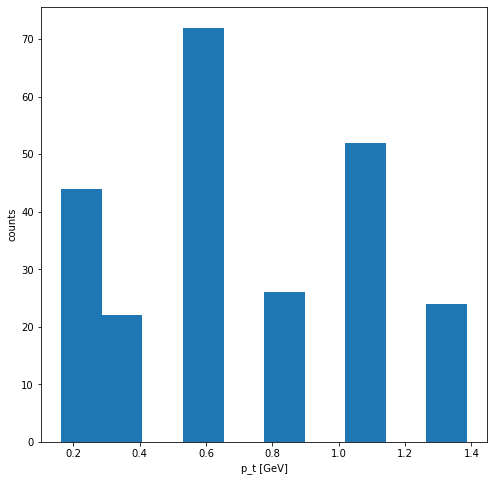

In [19]:
plt.close('all')
fig = plt.figure(figsize=(8,8))
plt.hist(event.pt, bins=10)
plt.xlabel('p_t [GeV]')
plt.ylabel('counts')
# plt.xlim((0.1, 1.5))
# plt.ylim((5, 40))
plt.show()

In [20]:
# merge hits with event~truth, first find r & phi 
event = hits.assign(r=r, phi=phi).merge(event, on="hit_id")
event.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,r,phi,tx,...,tz,tpx,tpy,tpz,weight,particle_id,vx,vy,vz,pt
0,1,-14.869700,-10.605,35.0,9,0,38,18.264008,-2.522066,-14.852000,...,43.741699,-0.273197,-0.162639,0.765421,1.0,10,0.0,0.0,0.0,0.317943
1,2,-15.744300,-11.110,35.0,9,1,144,19.269537,-2.527083,-15.722200,...,46.171398,-0.274899,-0.160593,0.765203,1.0,10,0.0,0.0,0.0,0.318370
2,3,-16.618999,-11.615,35.0,9,2,256,20.275585,-2.531606,-16.597000,...,48.600101,-0.276364,-0.157971,0.765186,1.0,10,0.0,0.0,0.0,0.318327
3,4,-17.493700,-12.120,35.0,9,3,374,21.282009,-2.535701,-17.476700,...,51.029800,-0.277693,-0.155004,0.765268,1.0,10,0.0,0.0,0.0,0.318025
4,5,-18.368401,-12.625,35.0,9,4,498,22.288759,-2.539426,-18.360901,...,53.460499,-0.279028,-0.152464,0.765253,1.0,10,0.0,0.0,0.0,0.317965


In [21]:
# assign event_id to this event
event = event.assign(event_id=int(event_prefix[-10:]))

In [22]:
event.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,r,phi,tx,...,tpx,tpy,tpz,weight,particle_id,vx,vy,vz,pt,event_id
0,1,-14.869700,-10.605,35.0,9,0,38,18.264008,-2.522066,-14.852000,...,-0.273197,-0.162639,0.765421,1.0,10,0.0,0.0,0.0,0.317943,0
1,2,-15.744300,-11.110,35.0,9,1,144,19.269537,-2.527083,-15.722200,...,-0.274899,-0.160593,0.765203,1.0,10,0.0,0.0,0.0,0.318370,0
2,3,-16.618999,-11.615,35.0,9,2,256,20.275585,-2.531606,-16.597000,...,-0.276364,-0.157971,0.765186,1.0,10,0.0,0.0,0.0,0.318327,0
3,4,-17.493700,-12.120,35.0,9,3,374,21.282009,-2.535701,-17.476700,...,-0.277693,-0.155004,0.765268,1.0,10,0.0,0.0,0.0,0.318025,0
4,5,-18.368401,-12.625,35.0,9,4,498,22.288759,-2.539426,-18.360901,...,-0.279028,-0.152464,0.765253,1.0,10,0.0,0.0,0.0,0.317965,0


## The $x, y, z$ Distributions

### (+) Vertical Intersection ($x, y$) in Detection Layers

As shown in the figure below, the hits are semi evenly distributed on the detector surface $x, y$.  The white circle in the center of the plot is where the beam pipe lies.  Thanks [agerom] for [the clarification][clar].

The colors represent different detector volumes.  Thanks to [Joshua Bonatt's notebook][josh].

[josh]: https://www.kaggle.com/jbonatt/trackml-eda-etc
[clar]: https://www.kaggle.com/wesamelshamy/trackml-problem-explanation-and-data-exploration/comments#323803
[agerom]: https://www.kaggle.com/artemiosgeromitsos

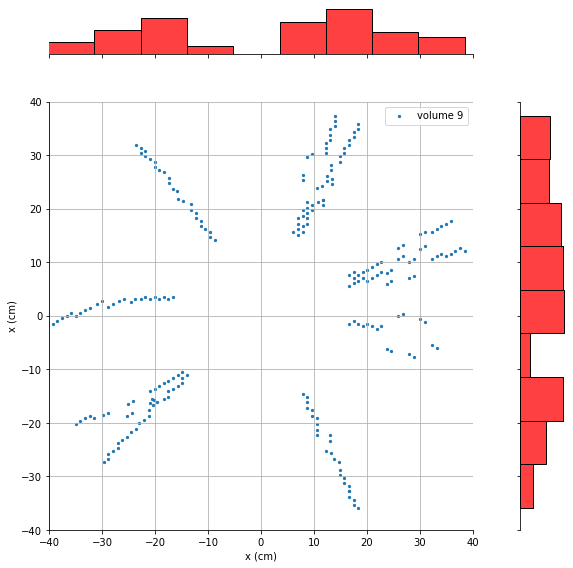

In [23]:
# Plotting with Seaborn & Matplotlib:
g = sns.jointplot(data=hits, x='x', y='y', space=1, height=8, color="r")
g.ax_joint.cla()
plt.sca(g.ax_joint)

volumes = hits.volume_id.unique()
for volume in volumes:
    v = hits[hits.volume_id == volume]
    plt.scatter(v.x, v.y, s=5, label='volume {}'.format(volume))

plt.xlabel('x (cm)')
plt.ylabel('x (cm)')
plt.xlim((-40,40))
plt.ylim((-40,40))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend(fontsize=10, loc='best')
plt.show()

### (+) Horizonal Intersection ($y, z$) in Detection Layers
You can think of the chart below as a horizontal intersection in the detection surface, where every dot is a hit.  Notice the relationship between the different activity levels in this chart and the one above for $x, y$.

Again, the colors represent different volumes in the detector surface.

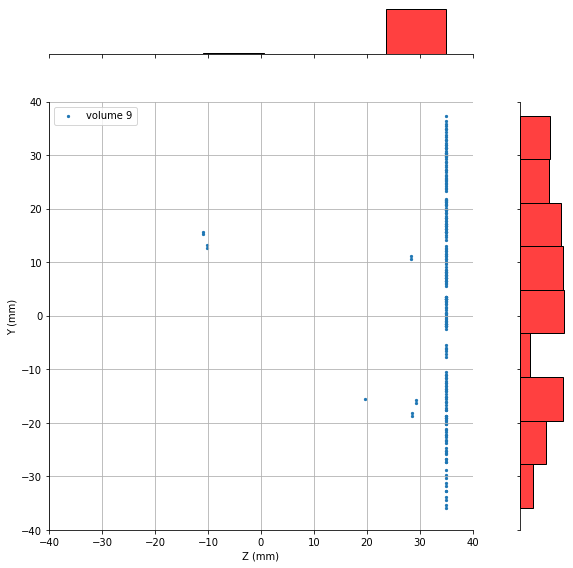

In [24]:
g = sns.jointplot(data=hits, x='z', y='y', space=1, height=8, color="r")
g.ax_joint.cla()
plt.sca(g.ax_joint)

volumes = hits.volume_id.unique()
for volume in volumes:
    v = hits[hits.volume_id == volume]
    plt.scatter(v.z, v.y, s=5, label='volume {}'.format(volume))
    
plt.xlabel('Z (mm)')
plt.ylabel('Y (mm)')
plt.xlim((-40,40))
plt.ylim((-40,40))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend(fontsize=10, loc='best')
plt.show()

### (+) 3D Intersection ($x, y, z$) in Detection Layers

And here is how the hits in this event look like in 3D.  Again, a sample from one event.  This combines the previous two charts in 3D.

Notice how the particles penetrate the detector surface along $z$ coordinate.

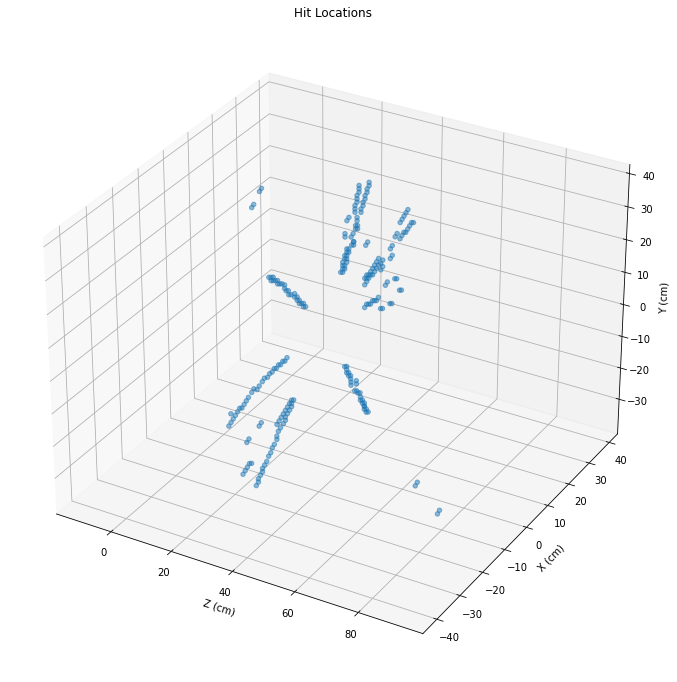

In [25]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
for volume in volumes:
    v = hits[hits.volume_id == volume]
    ax.scatter(v.z, v.x, v.y, label='volume {}'.format(volume), alpha=0.5)

ax.set_title('Hit Locations')
ax.set_xlabel('Z (cm)')
ax.set_ylabel('X (cm)')
ax.set_zlabel('Y (cm)')
plt.show()